In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
train_data = pd.read_csv("train.csv")
vali_data = pd.read_csv("test.csv")

In [3]:
vali_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
House_id = vali_data["Id"]

In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
y = train_data.SalePrice

In [8]:
# decide which features should include -- and exclude the multicolinearity features. 

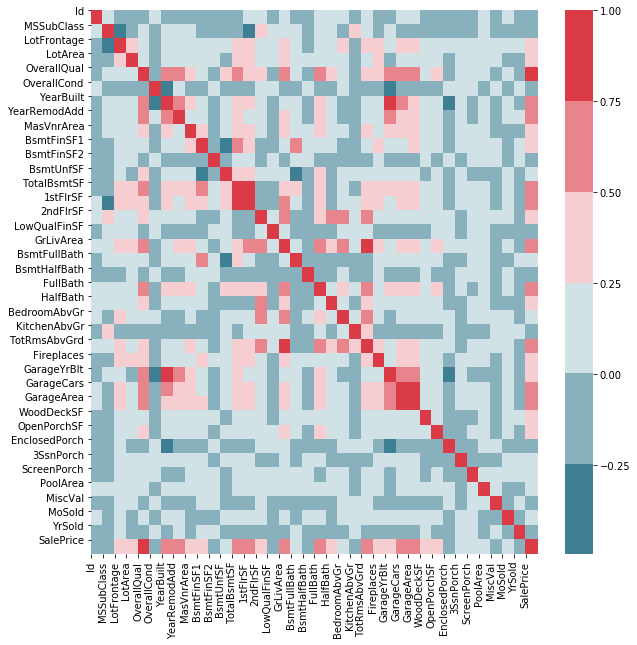

In [9]:
# correlationship among variables 
corr = train_data.corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=False)
sns.heatmap(corr, cmap=colormap, fmt=".2f")
# sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

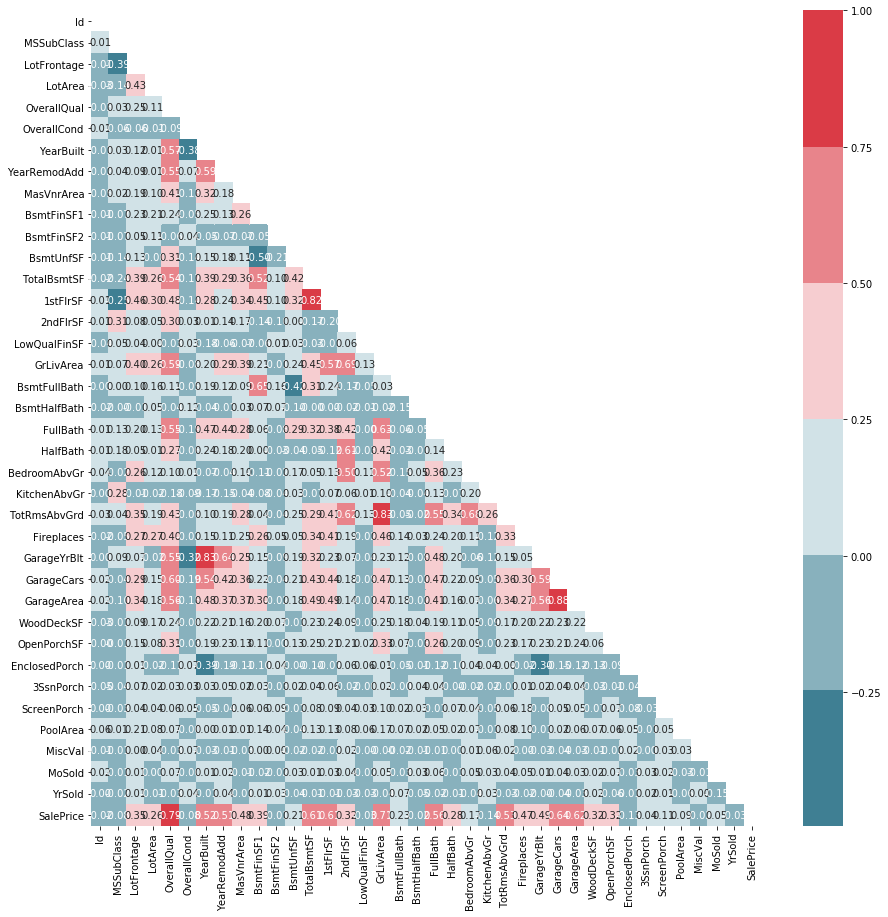

In [10]:
# drop mirror correlationsip 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap=colormap, annot = True,fmt=".2f", mask=mask)


In [11]:
# From the previous plt, we can know the sales price is highly correlated with 
# OverallQual, YearBuilt, YearRemodadd, TotalBsmSF, 1stFlrSF, 
# GrLivArea, FULLBath, TotRmsAbvGrd, GaeageYeaBilt, GarageArea, Garagecars
# GarageYrBilt is hithly correlated with YearBuilt, YearRemodadd, 
# GarageArea is higly correlated with Garage cars, then drop one. 
# then,drop these three 

In [12]:
# The final  8 Features 
Features = ["OverallQual", "YearBuilt", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd","GarageArea"]

In [13]:
test_data = vali_data[Features]

In [14]:
X = train_data[Features]

In [15]:
X.describe()
# No missing data

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1057.429452,1162.626712,1515.463699,1.565068,6.517808,472.980137
std,1.382997,30.202904,438.705324,386.587738,525.480383,0.550916,1.625393,213.804841
min,1.000000,1872.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000
25%,5.000000,1954.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,334.500000
50%,6.000000,1973.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,480.000000
75%,7.000000,2000.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,576.000000
max,10.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,1418.000000


In [16]:
X.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
0,7,2003,856,856,1710,2,8,548
1,6,1976,1262,1262,1262,2,6,460
2,7,2001,920,920,1786,2,6,608
3,7,1915,756,961,1717,1,7,642
4,8,2000,1145,1145,2198,2,9,836


In [17]:
# Define model, specify a number for random_state to ensure same results each run
train_model = DecisionTreeRegressor(random_state= 1)
train_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [18]:
print ("Maing Predictions for the following 5 houses:")
print (X.head())
print ("The predictions are")
print (train_model.predict(X.head()))

Maing Predictions for the following 5 houses:
   OverallQual  YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  \
0            7       2003          856       856       1710         2   
1            6       1976         1262      1262       1262         2   
2            7       2001          920       920       1786         2   
3            7       1915          756       961       1717         1   
4            8       2000         1145      1145       2198         2   

   TotRmsAbvGrd  GarageArea  
0             8         548  
1             6         460  
2             6         608  
3             7         642  
4             9         836  
The predictions are
[208500. 181500. 223500. 140000. 250000.]


In [19]:
# only use the train_data to test the model

predict_house_price = train_model.predict(X)

In [20]:
predict_house_price

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [21]:
# use root-mean-squared -error (RMSE)

In [22]:
RMSE = sqrt(mean_squared_error(y,predict_house_price))

In [23]:
RMSE

884.2698051817467

In [24]:
# imputes missing values in numerical data
# imputes missing values and applies a one-hot encoding to catergoricla data

In [25]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64','float64']]

In [26]:
numerical_transformer = SimpleImputer(strategy = "constant")

In [27]:
preprocessor = ColumnTransformer(
    transformers =[
       ("num", numerical_transformer, numerical_cols)
    ]
)

In [28]:
model_2 = RandomForestRegressor(n_estimators= 100, random_state=0)

In [29]:
my_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model_2)
])

In [30]:
my_pipeline.fit(X,y)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='constant', verbose=0), ['OverallQual', 'YearBuilt', 'TotalBs...imators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [31]:
model_2

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
preds = my_pipeline.predict(test_data)

In [33]:
test_data["SalePrice"] = preds

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
test_data['Id'] = House_id

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
test_data.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice,Id
0,5,1961,882.0,896,896,1,5,730.0,132209.00,1461
1,6,1958,1329.0,1329,1329,1,6,312.0,151227.00,1462
2,5,1997,928.0,928,1629,2,6,482.0,161735.10,1463
3,6,1998,926.0,926,1604,2,7,470.0,183422.00,1464
4,8,1992,1280.0,1280,1280,2,5,506.0,222695.46,1465


In [36]:
final_data = test_data[['Id','SalePrice']]

In [38]:
final_data.to_csv("Hourse price Prediction_2.csv" ,index = False)